# 共享单车数据分析

# 目录
1. 明确目的
2. 理解数据
 * 采集数据
 * 导入数据
 * 查看数据集信息
3. 数据清洗
 * 数据预处理
 * 特征工程
4. 可视化分析
 * 租车量在各特征下的分布
 * 租车量在多变量下的变化
5. 总结和建议

# 1. 明确目的
通过历史用车数据，找出影响用户借车次数的因素，并分析这些因素对用户借车次数产生的影响。

# 2. 理解数据
## 2.1 采集数据
数据来源于kaggle官网[kaggle共享单车项目](https://www.kaggle.com/c/bike-sharing-demand/data)

## 2.2 导入数据

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
train=pd.read_csv(r'C:\Users\lqy\Desktop\train.csv')
test=pd.read_csv(r'C:\Users\lqy\Desktop\test.csv')

## 2.3 查看数据信息

In [3]:
#查看数据集的大小
print('训练数据集大小:',train.shape,'\n','测试数据集大小:',test.shape)

训练数据集大小: (10886, 12) 
 测试数据集大小: (6493, 9)


In [4]:
#查看数据类型
print('训练数据集信息'.center(50,'-'))
train.info()
print('测试数据集信息'.center(50,'-'))
test.info()

---------------------训练数据集信息----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
---------------------测试数据集信息----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 n

In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**数据说明：**
* datetime日期时间—年月日小时
* season季节—1：春，2：夏，3：秋，4：冬
* holiday节假期—0：否，1：是
* workingday非周末非节假日—0：否，1：是
* temp实践温度—摄氏度
* atemp体感温度—摄氏度
* humidity湿度—相对湿度
* windspeed—风速
* casual—非注册用户
* registered——注册用户
* count—租车数

**结论**
* 训练数据有10086行12列，所有字段都没有缺失值
* datetime为字符串型，需要将格式转换为时间序列，其他的为数值型
* 简单的描述统计可以看出数值型数据没有明显的异常值。


# 3.  数据清洗
## 3.1 数据预处理

In [7]:
#更改列名
columns_dict={'datetime':'日期时间',
             'season':'季节',
              'holiday':'假期',
             'workingday':'工作日',
             'weather':'天气',
             'temp':'实际温度 ',
              'atemp':'体感温度',
             'humidity':'湿度',
             'windspeed':'风速',
             'casual':'非注册用户',
             'registered':'注册用户',
             'count':'租车数'}
train.rename(columns=columns_dict,inplace=True)

In [8]:
train.head()

,日期时间,季节,假期,工作日,天气,实际温度,体感温度,湿度,风速,非注册用户,注册用户,租车数
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
bikedf=train

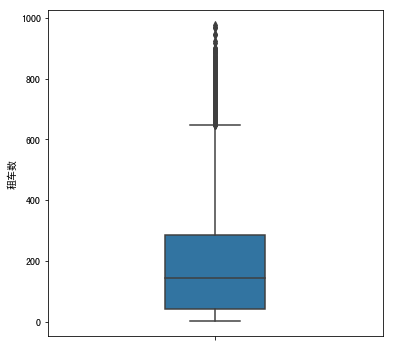

In [10]:
#处理异常值
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig,axes=plt.subplots()
fig.set_size_inches(6,6)
sns.boxplot(data=bikedf,y='租车数',ax=axes,width=.3,orient='v')

In [11]:
#计算异常值的范围，删除异常值
count=bikedf['租车数'].sort_values(ascending=True).values

def IQR(data):
    Q1,Q3=np.percentile(data,[25,75])
    result=Q3-Q1
    return [Q1,Q3,result]

lower=IQR(count)[0]-1.5*IQR(count)[2]
upper=IQR(count)[1]+1.5*IQR(count)[2]

bikedf_clean=pd.DataFrame(bikedf[bikedf['租车数']<=upper]).reset_index()

In [12]:
print('删除异常值前数据集大小:',bikedf.shape,'\n','删除异常值后数据集的大小:',bikedf_clean.shape)

删除异常值前数据集大小: (10886, 12) 
 删除异常值后数据集的大小: (10586, 13)


## 3.2 特征工程

* 从日期时间中提取不同维度的时间：月份、星期、小时

In [13]:
from datetime import datetime,date
import calendar

In [14]:
#月份
def get_month(x):
    datestr=x.split(' ')[0]
    dt=datetime.strptime(datestr,'%Y-%m-%d')
    month=dt.month
    return month
bikedf_clean['月份']=bikedf_clean['日期时间'].apply(get_month)

In [15]:
#星期
def get_weekday(x):
    datestr=x.split(' ')[0]
    dt=datetime.strptime(datestr,'%Y-%m-%d')
    week_day=dt.weekday()
    return week_day
bikedf_clean['星期']=bikedf_clean['日期时间'].apply(get_weekday)
bikedf_clean['星期']=bikedf_clean['星期'].apply(lambda x:calendar.day_name[x])

In [16]:
#小时
def get_hour(x):
    hour=x.split(' ')[1].split(':')[0]
    int_hour=int(hour)
    return int_hour
bikedf_clean['小时']=bikedf_clean['日期时间'].apply(get_hour)

In [17]:
bikedf_clean.drop(['index','日期时间'],axis=1,inplace=True)
bikedf_clean.head()

,季节,假期,工作日,天气,实际温度,体感温度,湿度,风速,非注册用户,注册用户,租车数,月份,星期,小时
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,Saturday,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,Saturday,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,Saturday,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,Saturday,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,Saturday,4


* ** 分类变量离散化 **

分类变量：季节、假期、工作日、天气

In [18]:
#季节
season_dict={1:'春',
            2:'夏',
            3:'秋',
            4:'冬'}
bikedf_clean['季节']=bikedf_clean['季节'].map(season_dict)

In [19]:
#天气
weather_dict={1:'晴',
              2:'多云',
              3:'小雨或小雪',
              4:'暴雨或暴雪'}
bikedf_clean['天气']=bikedf_clean['天气'].map(weather_dict)

In [20]:
#假期
holiday_dict={0:'否',
             1:'是'}
bikedf_clean['假期']=bikedf_clean['假期'].map(holiday_dict)

In [21]:
#工作日
workingday_dict={0:'否',
             1:'是'}
bikedf_clean['工作日']=bikedf_clean['工作日'].map(holiday_dict)

In [22]:
bikedf_clean.head()

,季节,假期,工作日,天气,实际温度,体感温度,湿度,风速,非注册用户,注册用户,租车数,月份,星期,小时
0,春,否,否,晴,9.84,14.395,81,0.0,3,13,16,1,Saturday,0
1,春,否,否,晴,9.02,13.635,80,0.0,8,32,40,1,Saturday,1
2,春,否,否,晴,9.02,13.635,80,0.0,5,27,32,1,Saturday,2
3,春,否,否,晴,9.84,14.395,75,0.0,3,10,13,1,Saturday,3
4,春,否,否,晴,9.84,14.395,75,0.0,0,1,1,1,Saturday,4


## 3.3 特征选择

In [23]:
correlation=bikedf_clean.corr()
correlation

,实际温度,体感温度,湿度,风速,非注册用户,注册用户,租车数,月份,小时
实际温度,1.000000,0.985887,-0.051216,-0.021912,0.468614,0.304585,0.388065,0.261946,0.133844
体感温度,0.985887,1.000000,-0.030373,-0.062398,0.463624,0.302263,0.384680,0.268960,0.129188
湿度,-0.051216,-0.030373,1.000000,-0.319719,-0.335296,-0.274223,-0.323363,0.207596,-0.270745
风速,-0.021912,-0.062398,-0.319719,1.000000,0.088725,0.102881,0.110181,-0.152754,0.145146
非注册用户,0.468614,0.463624,-0.335296,0.088725,1.000000,0.513744,0.717512,0.095946,0.301604
注册用户,0.304585,0.302263,-0.274223,0.102881,0.513744,1.000000,0.966215,0.171011,0.412861
租车数,0.388065,0.384680,-0.323363,0.110181,0.717512,0.966215,1.000000,0.167664,0.425799
月份,0.261946,0.268960,0.207596,-0.152754,0.095946,0.171011,0.167664,1.000000,-0.007775
小时,0.133844,0.129188,-0.270745,0.145146,0.301604,0.412861,0.425799,-0.007775,1.000000


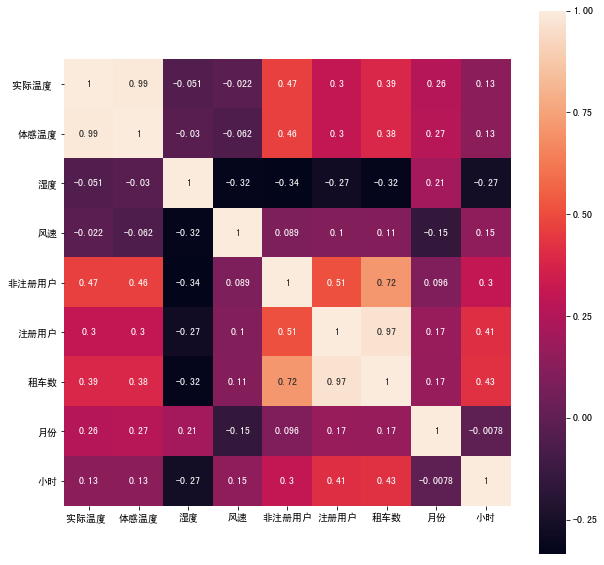

In [24]:
#特征之间相关性可视化分析
fig,axes=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,ax=axes,annot=True,square=True)

** 结论： **

租车数
* 与温度正相关，温度升高影响租车量增加
* 与湿度负相关，湿度越大影响租车量减少
* 与小时正相关，租车量随一天中时间而变化
* 温湿度与季节、月份、天气有关，可以进一步分析这些离散变量对租车数的影响

# 4. 可视化分析
## 4.1 租车数在各特征下的分布
分类变量：季节、月份、星期、假期、工作日、天气、小时

[Text(0,0.5,'租车数'), Text(0.5,0,'工作日'), Text(0.5,1,'工作日租车数箱线图')]

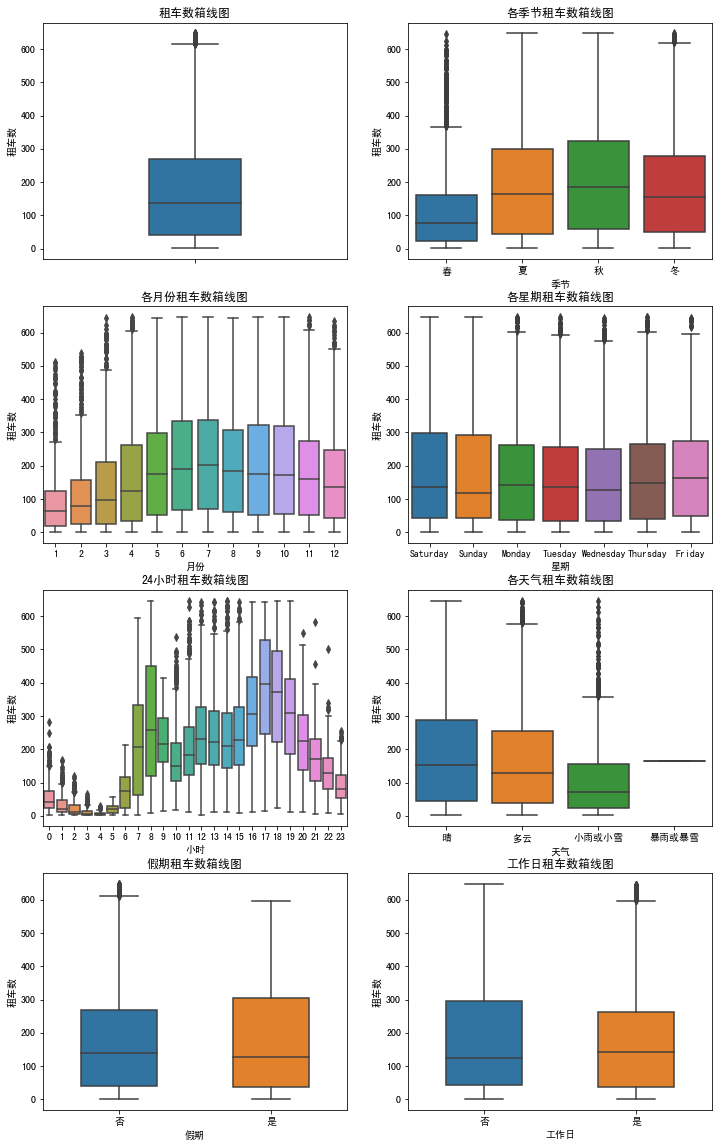

In [25]:
fig,axes=plt.subplots(4,2)
fig.set_size_inches(12,20)

ax1=sns.boxplot(data=bikedf_clean,y='租车数',width=.3,orient='v',ax=axes[0][0])
ax2=sns.boxplot(data=bikedf_clean,x='季节',y='租车数',orient='v',ax=axes[0][1])
ax3=sns.boxplot(data=bikedf_clean,x='月份',y='租车数',orient='v',ax=axes[1][0])
ax4=sns.boxplot(data=bikedf_clean,x='星期',y='租车数',orient='v',ax=axes[1][1])
ax5=sns.boxplot(data=bikedf_clean,x='小时',y='租车数',orient='v',ax=axes[2][0])
ax6=sns.boxplot(data=bikedf_clean,x='天气',y='租车数',orient='v',ax=axes[2][1])
ax7=sns.boxplot(data=bikedf_clean,x='假期',y='租车数',width=.5,orient='v',ax=axes[3][0])
ax8=sns.boxplot(data=bikedf_clean,x='工作日',y='租车数',width=.5,orient='v',ax=axes[3][1])

ax1.set(ylabel='租车数',title='租车数箱线图')
ax2.set(xlabel='季节',ylabel='租车数',title='各季节租车数箱线图')
ax3.set(xlabel='月份',ylabel='租车数',title='各月份租车数箱线图')
ax4.set(xlabel='星期',ylabel='租车数',title='各星期租车数箱线图')
ax5.set(xlabel='小时',ylabel='租车数',title='24小时租车数箱线图')
ax6.set(xlabel='天气',ylabel='租车数',title='各天气租车数箱线图')
ax7.set(xlabel='假期',ylabel='租车数',title='假期租车数箱线图')
ax8.set(xlabel='工作日',ylabel='租车数',title='工作日租车数箱线图')

** 结论： **
* 租车数的中位数在150左右
* 5月-10月天气温暖的时候租车数比较多
* 天气越好租车的人约多
* 工作日租车的人比较多，一天之内早晚高峰租车人数很多，说明人们租车的主要目的是上下班

## 4.2 租车数在多变量下的变化

[Text(0.5,1,'月平均租车量')]

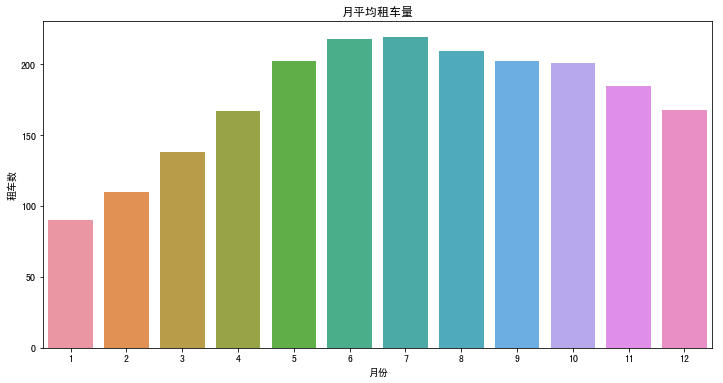

In [26]:
#月平均租车量
fig,axes=plt.subplots()
fig.set_size_inches(12,6)
count_by_month=pd.DataFrame(bikedf_clean.groupby(by='月份')['租车数'].mean()).reset_index()
sns.barplot(data=count_by_month,x='月份',y='租车数',ax=axes)
axes.set(title='月平均租车量')

[Text(0.5,1,'各季节每天平均租车数')]

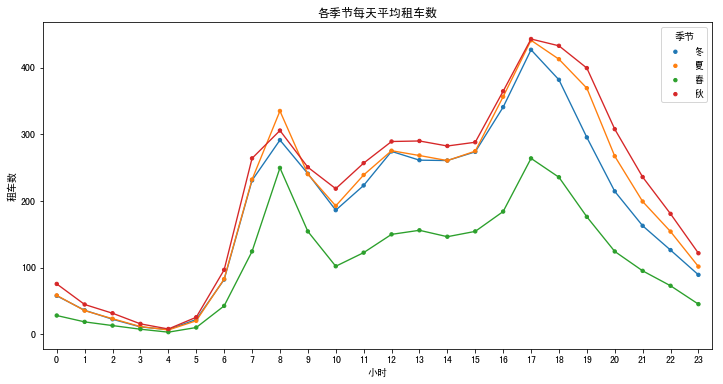

In [27]:
#各季节每天的平均租车数
fig,axes=plt.subplots()
fig.set_size_inches(12,6)

count_by_season=pd.DataFrame(bikedf_clean.groupby(by=['季节','小时'])['租车数'].mean()).reset_index()
sns.pointplot(data=count_by_season,x='小时',y='租车数',hue='季节',ax=axes,scale=.5)
axes.set(title='各季节每天平均租车数')

[Text(0.5,1,'各星期每小时平均租车数')]

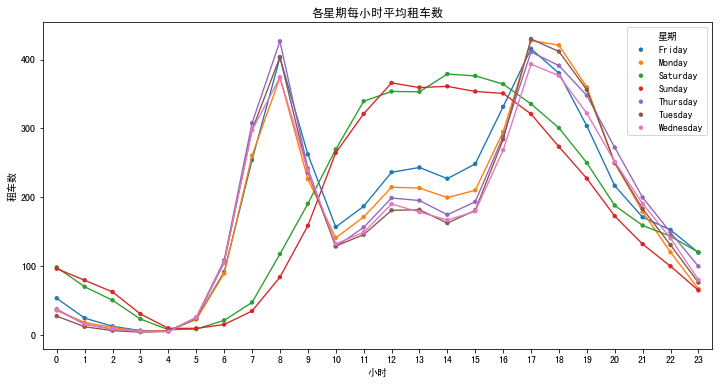

In [28]:
#星期平均租车数
fig,axes=plt.subplots()
fig.set_size_inches(12,6)
count_by_week=pd.DataFrame(bikedf_clean.groupby(by=['星期','小时'])['租车数'].mean()).reset_index()
sns.pointplot(data=count_by_week,x='小时',y='租车数',hue='星期',ax=axes,scale=.5)
axes.set(title='各星期每小时平均租车数')

[Text(0.5,1,'不同用户每天平均租车数')]

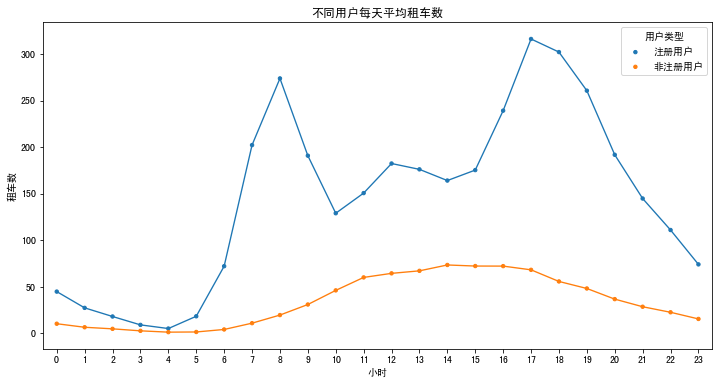

In [35]:
#不同用户每天平均租车数
fig,axes=plt.subplots()
fig.set_size_inches(12,6)

subtrain=bikedf_clean[['小时','注册用户','非注册用户','租车数']]
subtrain=pd.melt(subtrain,id_vars=['小时'],value_vars=['注册用户','非注册用户'],var_name='用户类型',value_name='租车数')
count_by_member=pd.DataFrame(subtrain.groupby(by=['小时','用户类型'],sort=True)['租车数'].mean()).reset_index()

sns.pointplot(data=count_by_member,x='小时',y='租车数',hue='用户类型',ax=axes,scale=.5)
axes.set(title='不同用户每天平均租车数')

** 结论： **
* 周一到周五早上7:00-9:00，傍晚17:00-19:00上下班高峰期租车数比较多
* 夏、秋租车数比较多，温暖的时候人们更愿意骑车，但是冬天租车数也较多，需进一步分析
* 注册用户早晚上下班高峰租车数多



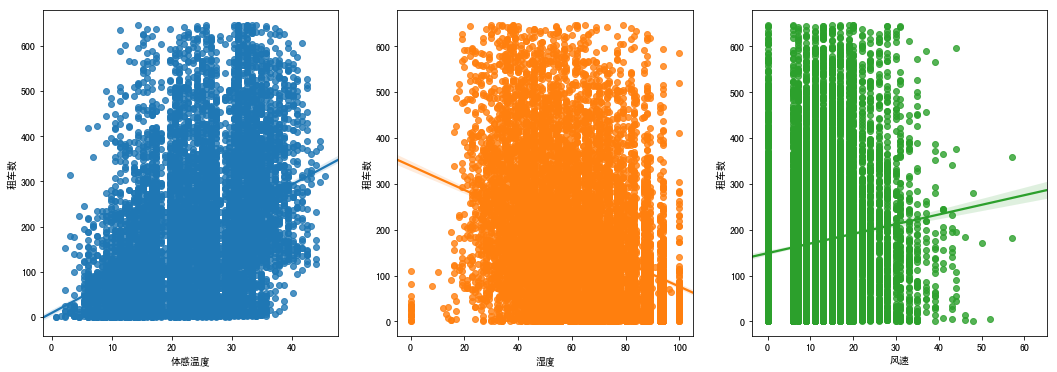

In [46]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
fig.set_size_inches(18,6)

sns.regplot(data=bikedf_clean,x='体感温度',y='租车数',ax=ax1)
sns.regplot(data=bikedf_clean,x='湿度',y='租车数',ax=ax2)
sns.regplot(data=bikedf_clean,x='风速',y='租车数',ax=ax3)

** 结论： **
* 温度低于10度，高于35度租车数较少
* 湿度低于30，高于90租车数很少，可以解释冬天虽然温度低，但是湿度比较适合骑行
* 风速越大，租车数越少

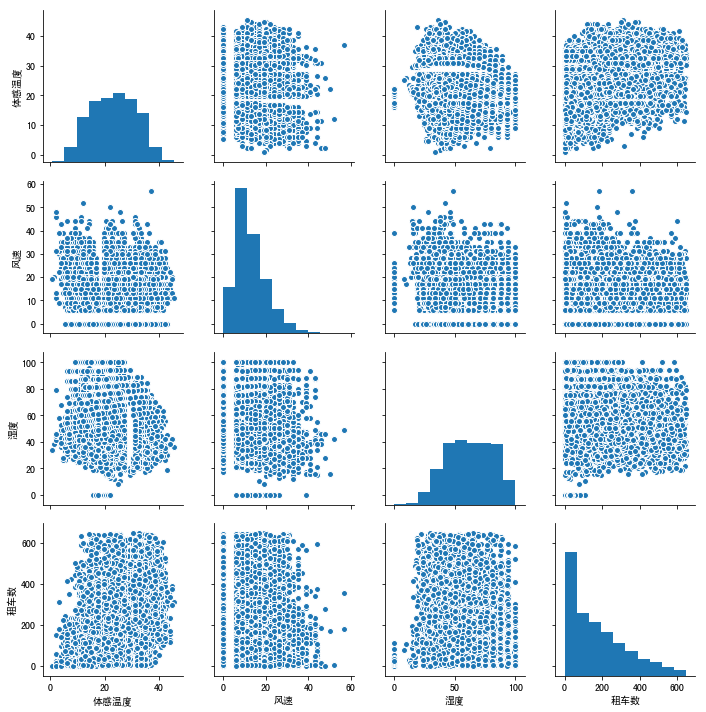

In [50]:
#多变量图
sns.pairplot(bikedf_clean[['体感温度','风速','湿度','租车数']])

# 5. 总结和建议
注册用户大部分都是上班族，人们租车的目的用于通勤，可以考虑将车发放在办公楼和地铁口附近，针对上班族实施营销。